<a href="https://colab.research.google.com/github/Eswa2020/data-prep-project/blob/master/Copy_of_Esther_Wairimu_Kamau_Independent_project_week_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#we start by  importing our libraries
#Importing Pandas
import pandas as pd

In [2]:
#Importing Numpy
import numpy as np

In [3]:
#Importing Seaborn
import seaborn as sns

In [4]:
#Importing Matplotlib
import matplotlib.pyplot as plt

In [5]:
#loading our datasets
#variable_definitions=
finance_definition=pd.read_csv('http://bit.ly/VariableDefinitions')
finance_definition.head(7)

,Variable Definitions,Unnamed: 1
0,country,Country interviewee is in.
1,year,Year survey was done in.
2,uniqueid,Unique identifier for each interviewee
3,location_type,"Type of location: Rural, Urban"
4,cellphone_access,"If interviewee has access to a cellphone: Yes, No"
5,household_size,Number of people living in one house
6,age_of_respondent,The age of the interviewee


In [6]:
#we see the rear end of the data too
finance_definition.tail()

,Variable Definitions,Unnamed: 1
7,gender_of_respondent,"Gender of interviewee: Male, Female"
8,relationship_with_head,The interviewee’s relationship with the head o...
9,marital_status,The martial status of the interviewee: Married...
10,education_level,Highest level of education: No formal educatio...
11,job_type,Type of job interviewee has: Farming and Fishi...


In [7]:
finance_data = pd.read_csv('http://bit.ly/FinancialDataset')
finance_data.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [8]:
finance_data.tail()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


In [ ]:
#First and foremost, EDA provides a stage for breaking down problem statements into smaller experiments which can help understand the dataset
#EDA provides relevant insights which help analysts make key business decisions
#we start by studying our data well

In [9]:
#we first get to know the number of entries in our dataset
#we have 23524 rows and 13 columns
print(finance_data.shape)

(23524, 13)


In [10]:
#Statistical description of the dataset
finance_data.describe()

,year,household_size,Respondent Age
count,23524.000000,23496.000000,23490.000000
mean,2016.979000,3.681818,38.804300
std,0.899669,2.279933,16.519996
min,2016.000000,0.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2056.000000,21.000000,100.000000


In [11]:
# we also get the statistical description of the categorical variable 
#from this we can see there some variables with missing/null data 'NaN' Values
finance_data.describe(include='all')

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
count,23510,23524.000000,23524,23488,23509,23513,23496.000000,23490.000000,23490,23520,23492,23495,23494
unique,4,NaN,8735,2,2,2,NaN,NaN,2,6,5,7,10
top,Rwanda,NaN,uniqueid_302,No,Rural,Yes,NaN,NaN,Female,Head of Household,Married/Living together,Primary education,Self employed
freq,8735,NaN,4,20179,14338,17449,NaN,NaN,13859,12829,10739,12775,6428
mean,NaN,2016.979000,NaN,NaN,NaN,NaN,3.681818,38.804300,NaN,NaN,NaN,NaN,NaN
std,NaN,0.899669,NaN,NaN,NaN,NaN,2.279933,16.519996,NaN,NaN,NaN,NaN,NaN
min,NaN,2016.000000,NaN,NaN,NaN,NaN,0.000000,16.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,2016.000000,NaN,NaN,NaN,NaN,2.000000,26.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,2017.000000,NaN,NaN,NaN,NaN,3.000000,35.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,2018.000000,NaN,NaN,NaN,NaN,5.000000,49.000000,NaN,NaN,NaN,NaN,NaN


In [12]:
#to confirm the above 
finance_data.isnull().values.any()

True

In [13]:
#to get all the null values positions and total number
#this helps us know if the null values are significant and if the are too many for us to drop 
#in out dataset theyare not too many
finance_data.isnull().sum()

country                   14
year                       0
uniqueid                   0
Has a Bank account        36
Type of Location          15
Cell Phone Access         11
household_size            28
Respondent Age            34
gender_of_respondent      34
The relathip with head     4
marital_status            32
Level of Educuation       29
Type of Job               30
dtype: int64

In [14]:
#we can replace the null values in the in the non-categorical data in our case the respondents age and household size
#this wont affect our data analysis
finance_data['household_size'].fillna(0, inplace=True)
finance_data['Respondent Age'].fillna(0, inplace=True)

In [16]:
#to confirm the above we repeat the above code
finance_data.isnull().sum()

country                   14
year                       0
uniqueid                   0
Has a Bank account        36
Type of Location          15
Cell Phone Access         11
household_size             0
Respondent Age             0
gender_of_respondent      34
The relathip with head     4
marital_status            32
Level of Educuation       29
Type of Job               30
dtype: int64

In [17]:
#we can seee we have 8735 disticnt values in unique_id column
finance_data.nunique()

country                      4
year                         6
uniqueid                  8735
Has a Bank account           2
Type of Location             2
Cell Phone Access            2
household_size              21
Respondent Age              86
gender_of_respondent         2
The relathip with head       6
marital_status               5
Level of Educuation          7
Type of Job                 10
dtype: int64

In [17]:
# we can also check for duplicated values
#we have no duplicated value
finance_data.duplicated().sum()


0

In [18]:
# Explanation:We can rename our columns to more reconginazible labels
#we will use the   function
#we can also rename our column names for easy accesssing
finance_data.rename(columns = {'Level of Educuation':'Education_level','Type of Job':'job_status','Respondent Age':'age','Has a Bank account':'bank_acc_status','Type of Location':'location','Cell Phone Access':'Phone_acess','The relathip with head':'relation_wit_head'},inplace = True)

In [19]:
finance_data.head()

,country,year,uniqueid,bank_acc_status,location,Phone_acess,household_size,age,gender_of_respondent,relation_wit_head,marital_status,Education_level,job_status
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


The Data associated with each attribute includes a long list of values (both numeric and Categorical), and having these values as a long series is not particularly useful yet – they don’t provide any standalone insight. In order to convert the raw data into information we can actually use, we need to summarize and then examine the variable’s distribution.

**the univariate distribution plots are graphs where we plot the histograms along with the estimated probability density function over the data. It’s one of the simplest techniques where we consider a single variable and observe its spread and statical properties**(not really sure). The univariate analysis for numerical and categorical attributes are different.





In [20]:
finance_data['bank_acc_status'].value_counts()

No     20179
Yes     3309
Name: bank_acc_status, dtype: int64

Text(0, 0.5, 'owns bank a/c')

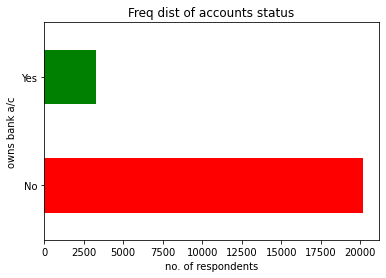

In [23]:

#For categorical columns we plot histograms, we use the value_count() and plot.bar() functions to draw a bar plot,
# which is commonly used for representing categorical data using rectangular bars with value counts of the categorical values.
# In this case, we only have two statuses for bank account 'yes' and 'no'.The bar plot shows comparisons among these discrete categories,
#with the x-axis showing the specific categories and the y-axis the measured value.
#it clearly shows that a significant number of the respondents dont have bank accounts
finance_data['bank_acc_status'].value_counts().plot.barh(title='Freq dist of accounts status',color=['red','green']) 
# Add title and axis names
plt.xlabel('no. of respondents')
plt.ylabel('owns bank a/c')
#Similarly, by changing the column name in the code above, we can analyze every categorical colum


Text(0, 0.5, 'country')

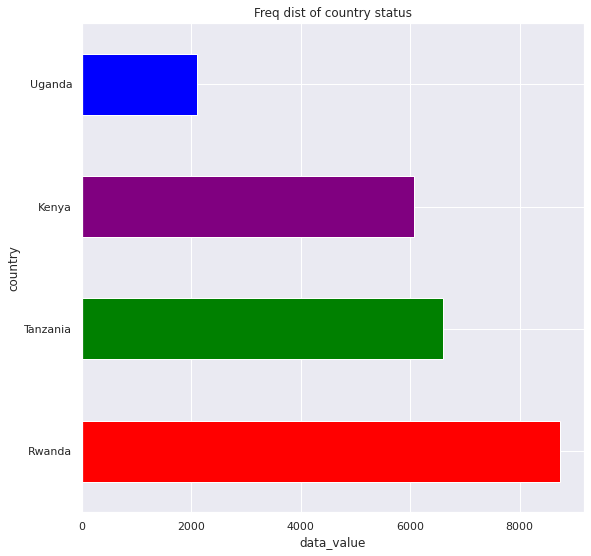

In [44]:
#we can go ahead and check in which country the respondents data was highest
#Using the graph, we can get the count or value count of the data used for all the countries. 
#We observe that most data was collected from rwanda and least from uganda.
finance_data['country'].value_counts().plot.barh(title='Freq dist of country status',color=['red','green','purple','blue']) 
# Add title and axis names
plt.xlabel('input_value')
plt.ylabel('country')

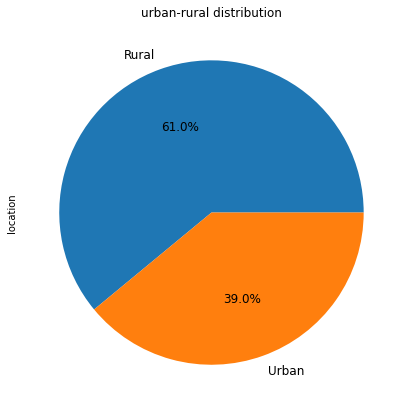

In [56]:
#we can go ahead and check in which location settings the respondents data was highest
#Using the pie_chart,A pie chart works best with two or three slices,
#we can get the count or value count of the location data .
#then we can go aheadand  code for the pie chart as  seen below
location_counts = finance_data['location'].value_counts()
location_Chart = location_counts.plot(kind="pie",y='Count',autopct='%1.1f%%',title='urban-rural distribution',fontsize=12,figsize=(7,7))



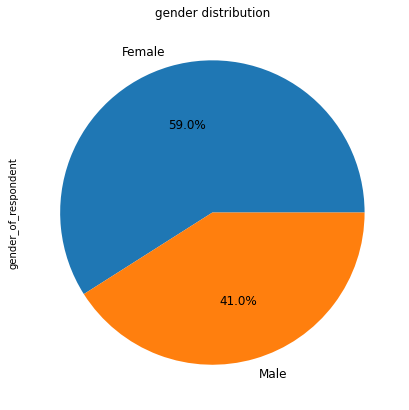

In [57]:
gender_counts = finance_data['gender_of_respondent'].value_counts()
Gender_Chart = gender_counts.plot(kind="pie",y='Count',autopct='%1.1f%%',title='gender distribution',fontsize=12,figsize=(7,7))

Text(0, 0.5, 'location')

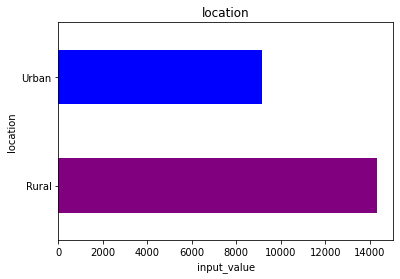

In [23]:

finance_data['location'].value_counts().plot.barh(title='location',color=['purple','blue']) 
# Add title and axis names
plt.xlabel('input_value')
plt.ylabel('location')
#most of the respondents in the dataset are from a rural setting

AttributeError: ignored

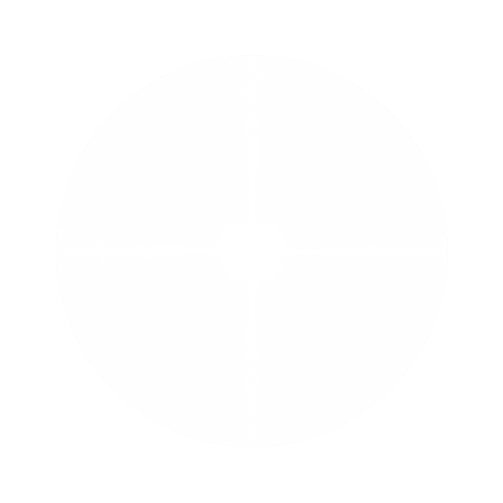

In [58]:
#Checking for Outliers
#The objective of a boxplot is to describe the variability in a set of values; it does so by using Percentiles,
#more commonly the 25th and 75th percentiles,
#also knows as the Quartiles, it also uses an estimate of Location, usually the Median, and the Range of the values.
#it has no outliers as we can see in the numerical columns we can use the variables
#year,household_size and respondents age for analysis
#the numerical vallues all have little or no distribution
finance_data.boxplot()
plt.xlabel('primary factors')
plt.ylabel('')
plt.title('Primary factors affecting financial inclusion distribution',loc='left',fontsize=16)
plt.show

In [ ]:
#since the data is from different years we can also demistify from which year it was highest
finance_data[''].value_counts().plot.pie(title='Freq dist of country status',color=['red','green','purple','blue']) 
#Add title and axis names
plt.xlabel('input_value')
plt.ylabel('country')

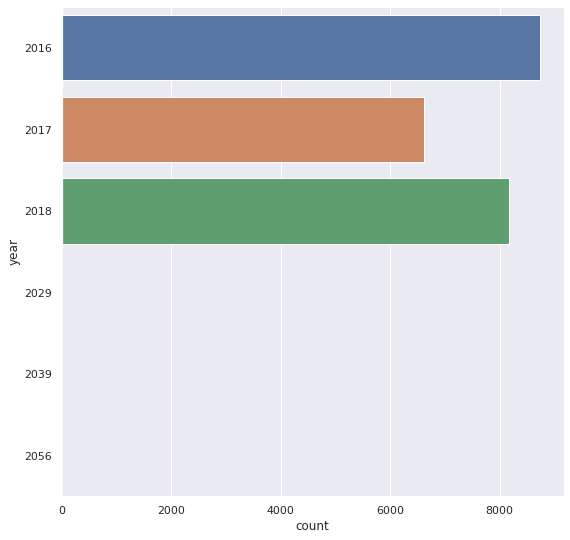

In [81]:
#we can go ahead and check in which country the responses are highest
#Using the graph, we can compare the range and distribution of the household_size for all the countries. 
#We observe that there is a greater variability in uganda area_mean but kenya have larger outliers.
sns.set(rc={'figure.figsize':(9,9)})
sns.countplot(y="year",data=finance_data,orient="h")


A categorical variable (sometimes called a nominal variable) is one that has two or more categories, but there is no intrinsic ordering to the categories.  For example, gender is a categorical variable having two categories (male and female) and there is no intrinsic ordering to the categories.  Hair color is also a categorical variable having a number of categories (blonde, brown, brunette, red, etc.) and again, there is no agreed way to order these from highest to lowest.  A purely categorical variable is one that simply allows you to assign categories but you cannot clearly order the variables.  If the variable has a clear ordering, then that variable would be an ordinal variable, as described below.

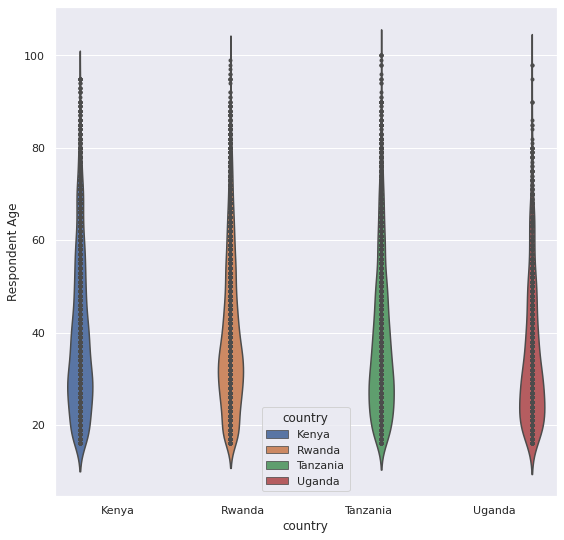

In [41]:
#we can learn about the respondents maturity by checking on age from each country
#This visualization allows us to see exactly how our data is distributed, and where it’s concentrated.
#We can see for  that the country with a high significant response rate is tanzania with the lowest being uganda
#This chart’s idea is to display the spread of the values, but instead of boxes and summaries, it shows the distribution shape.
#from this we can see that most respondents ages are above 20 and below 60 years
#This doesn’t allow us to make a conclusion, 
#but it does a great job guiding our research to what needs to be further investigated.
sns.set(rc={'figure.figsize':(9,9)})
sns.violinplot(x=finance_data['country'],y=finance_data['Respondent Age'],split=False,inner='points',hue='country',data=finance_data)

In [13]:
# we can confirm the above by getting the statistical description of the all  variables
finance_data.describe()

,year,household_size,Respondent Age
count,23524.000000,23496.000000,23490.000000
mean,2016.979000,3.681818,38.804300
std,0.899669,2.279933,16.519996
min,2016.000000,0.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2056.000000,21.000000,100.000000


In [20]:
finance_data.plot(kind="pie",y='age',autopct='%1.1f%%',title='Pie Chart',fontsize=12,figsize=(2,5))

ValueError: ignored

<Figure size 144x360 with 1 Axes>